<center><h1>Testing and Documentation Notebook for Cellular Automaton Using Inheritance from Numpy NDArray</h1></center>
<p>This document is for testing of a cellular automaton class which inherits much of its functionality from the Numpy module.  The class enables use of the array opperations (implemented in C) which should make the execution speed better.</p>
<h2>Initialization</h2>

In [76]:
from FireSimulation import *
FireGrid.IncludeDiagonalNeighbors = False

from IPython.display import display
from IPython.display import HTML
import inspect
from random import uniform

from math import *
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
matplotlib.rc('animation', html='html5')
goldenratio=1/2*(1+sqrt(5))
fsx=7
fsy=fsx/goldenratio

def InfoDocString(function):
    """Function to return function definition and document string."""
    
    code = inspect.getsource(function)
    docstring = inspect.getdoc(function)
    return code[0:code.find(':')+1].lstrip() +'\n' + docstring

<h3>Functions to help with testing</h3>

In [2]:
MyDtype = numpy.dtype([('Tree', bool), ('Burning', bool), ('ProbImmune', 'f'), ('Value', 'f', (3,))])

def init(grid, rows, columns):
    for y in range(rows):
        for x in range(columns):
            grid['ProbImmune'][y][x]  = random() * 4
            if random() < 0.75:
                MyGrid['Tree'][y][x]    = True
                MyGrid['Burning'][y][x] = random() < 0.1
            else:
                MyGrid['Tree'][y][x]    = False
                MyGrid['Burning'][y][x] = False
    grid.SetValue()
    grid.SetBoundary()

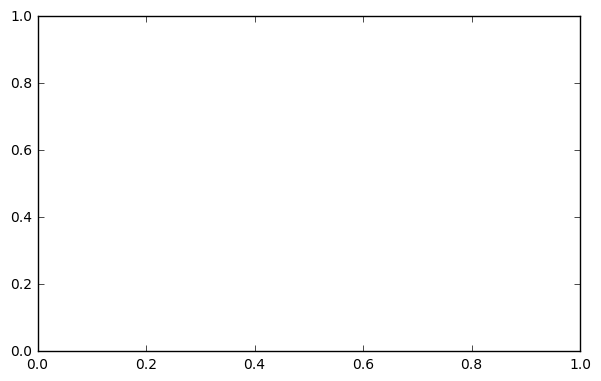

In [5]:
MyFigure, MyAxes = plt.subplots(1,1,figsize=(fsx,fsy))

<h2>Class Structure</h2>
<p>The class FireGrid inherts CAGird.  The information about this class is below.</p>

In [7]:
print(InfoDocString(FireGrid))

class FireGrid(CAGrid):
This class derives from CAGrid and changes update to make this a first simulation


In [12]:
print(InfoDocString(FireGrid.Update))

def Update(self):
Update rules for a simple fire simulation


<h2>Test a 3 x 3 Behavior</h2>
<p>Below, we test a 3 X 3 grid.  The initial state of each cell is random.  We can check the behavior by visuallt inspecting the grid before an after updates.</p>

The tree grid is:
[[False  True False]
 [ True  True  True]
 [ True  True False]]
The Burrning grid is
[[False  True False]
 [False  True  True]
 [False False False]]


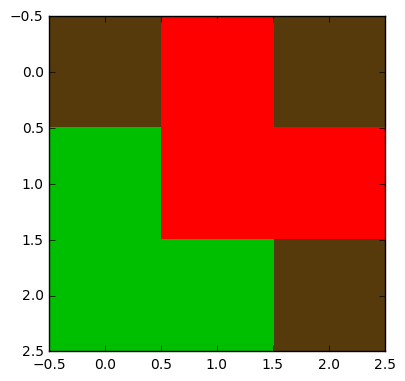

In [20]:
rows = 3
columns = 3
MyGrid=FireGrid((rows,columns),MyDtype)
init(MyGrid,rows,columns)
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
print('The tree grid is:')
print(MyGrid['Tree'])
print('The Burrning grid is')
print(MyGrid['Burning'])
MyFigure

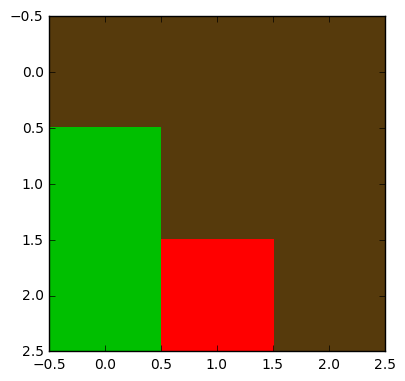

In [21]:
MyGrid.Update()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

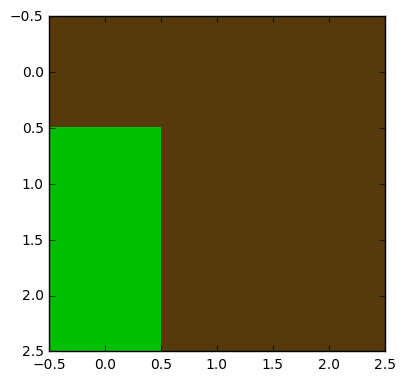

In [22]:
MyGrid.Update()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

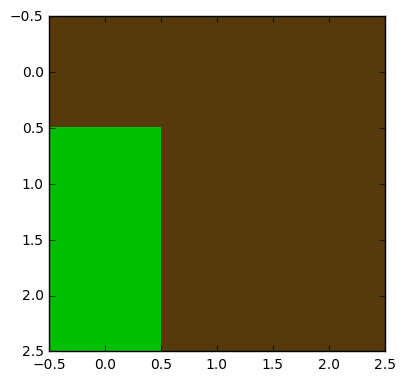

In [23]:
MyGrid.Update()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

<h2>Small Grid Animation Test</h2>
<p>In the cells below, we setup the simulation and run a small fire simulation.</p>

In [49]:
def uf():
    MyGrid.Update()
    MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
    #MyAxes.imshow(MyGrid['Value'])
    MyFigure

In [50]:
def af(n):
    uf()

In [62]:
def init(grid, rows, columns, probtree, probburning):
    for y in range(rows):
        for x in range(columns):
            grid['ProbImmune'][y][x]  = random() * 4
            if random() < probtree:
                MyGrid['Tree'][y][x]    = True
                MyGrid['Burning'][y][x] = random() < probburning
            else:
                MyGrid['Tree'][y][x]    = False
                MyGrid['Burning'][y][x] = False
    grid.SetValue()
    grid.SetBoundary()

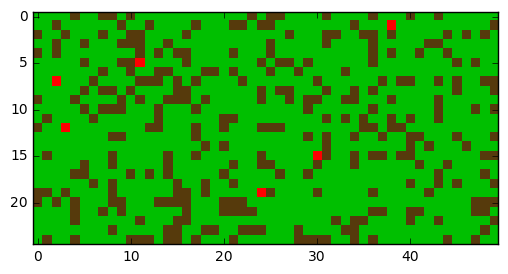

In [73]:
rows = 25
columns = 50
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns,probtree=0.75, probburning=0.01)
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [74]:
AnimationFrames = 25  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 1.2 seconds long.


In [75]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation.save('FireSim_Small_Grid.mp4')

<video width="400" height="222" controls="controls">
  <source src="/home/wholmes3/CellularAutomaton/FireSim_Small_Grid.mp4" type="video/mp4" />
</video>

In [79]:
HTML("""
<video width="320" height="240" controls>
  <source src="/home/wholmes3/CellularAutomaton/FireSim_Small_Grid.mp4" type="video/mp4">
</video>
""")

<h2>Large Grid Simulations</h2>
<h3>Simulation 01</h3>

In [ ]:
rows = 100
columns = 200
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns)
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [ ]:
AnimationFrames = 200  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Simulation 02</h3>

In [ ]:
def init(grid, rows, columns):
    for y in range(rows):
        for x in range(columns):
            grid['ProbImmune'][y][x]  = random() * 4
            if random() < 0.75:
                MyGrid['Tree'][y][x]    = True
                MyGrid['Burning'][y][x] = False
            else:
                MyGrid['Tree'][y][x]    = False
                MyGrid['Burning'][y][x] = False
    grid.SetValue()
    grid.SetBoundary()

In [ ]:
rows = 200
columns = 400
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns)
MyGrid['Burning'][100][98] = True
MyGrid['Burning'][100][99]  = True
MyGrid['Burning'][100][100] = True
MyGrid['Burning'][100][101] = True
MyGrid['Burning'][100][102] = True

MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [ ]:
AnimationFrames = 300  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Simulation 04</h3>

In [ ]:
def init(grid, rows, columns):
    for y in range(rows):
        for x in range(columns):
            grid['ProbImmune'][y][x]  = uniform(.2, .75) * 4
            if random() < 0.9:
                MyGrid['Tree'][y][x]    = True
                MyGrid['Burning'][y][x] = False
            else:
                MyGrid['Tree'][y][x]    = False
                MyGrid['Burning'][y][x] = False
    grid.SetValue()
    grid.SetBoundary()

In [ ]:
rows = 200
columns = 400
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns)
MyGrid['Burning'][100][98] = True
MyGrid['Burning'][100][99]  = True
MyGrid['Burning'][100][100] = True
MyGrid['Burning'][100][101] = True
MyGrid['Burning'][100][102] = True

MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [ ]:
AnimationFrames = 300  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Simulation 05</h3>

In [ ]:
from random import uniform

In [ ]:
def init(grid, rows, columns):
    for y in range(rows):
        for x in range(columns):
            grid['ProbImmune'][y][x]  = uniform(.2, .75) * 4
            if random() < 0.8:
                MyGrid['Tree'][y][x]    = True
                MyGrid['Burning'][y][x] = False
            else:
                MyGrid['Tree'][y][x]    = False
                MyGrid['Burning'][y][x] = False
    grid.SetValue()
    grid.SetBoundary()

In [ ]:
rows = 200
columns = 400
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns)
MyGrid['Burning'][100][98] = True
MyGrid['Burning'][100][99]  = True
MyGrid['Burning'][100][100] = True
MyGrid['Burning'][100][101] = True
MyGrid['Burning'][100][102] = True

MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [ ]:
AnimationFrames = 500  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Simulation 05</h3>

In [ ]:
from random import uniform

In [ ]:
def init(grid, rows, columns):
    for y in range(rows):
        for x in range(columns):
            grid['ProbImmune'][y][x]  = uniform(.2, .75) * 4
            if random() < 0.85:
                MyGrid['Tree'][y][x]    = True
                MyGrid['Burning'][y][x] = False
            else:
                MyGrid['Tree'][y][x]    = False
                MyGrid['Burning'][y][x] = False
    grid.SetValue()
    grid.SetBoundary()

In [ ]:
rows = 200
columns = 400
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns)
MyGrid['Burning'][100][98] = True
MyGrid['Burning'][100][99]  = True
MyGrid['Burning'][100][100] = True
MyGrid['Burning'][100][101] = True
MyGrid['Burning'][100][102] = True

MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [ ]:
AnimationFrames = 500  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Simulation 05</h3>

In [ ]:
def init(grid, rows, columns):
    for y in range(rows):
        for x in range(columns):
            grid['ProbImmune'][y][x]  = uniform(.2, .75) * 4
            if random() < 0.77:
                MyGrid['Tree'][y][x]    = True
                MyGrid['Burning'][y][x] = False
            else:
                MyGrid['Tree'][y][x]    = False
                MyGrid['Burning'][y][x] = False
    grid.SetValue()
    grid.SetBoundary()

In [ ]:
rows = 200
columns = 400
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns)
MyGrid['Burning'][:][0]  = True

MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [ ]:
AnimationFrames = 500  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Simulation 05</h3>

In [ ]:
def init(grid, rows, columns):
    for y in range(rows):
        for x in range(columns):
            grid['ProbImmune'][y][x]  = uniform(.2, .75) * 4
            if random() < 0.83:
                MyGrid['Tree'][y][x]    = True
                MyGrid['Burning'][y][x] = False
            else:
                MyGrid['Tree'][y][x]    = False
                MyGrid['Burning'][y][x] = False
    grid.SetValue()
    grid.SetBoundary()

In [ ]:
rows = 200
columns = 400
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns)
MyGrid['Burning'][1][:]  = True

MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [ ]:
AnimationFrames = 500  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimationB = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimationB

<h3>Simulation 05</h3>

In [ ]:
def init(grid, rows, columns):
    for y in range(rows):
        for x in range(columns):
            grid['ProbImmune'][y][x]  = uniform(.2, .75) * 4
            if random() < 0.80:
                MyGrid['Tree'][y][x]    = True
                MyGrid['Burning'][y][x] = False
            else:
                MyGrid['Tree'][y][x]    = False
                MyGrid['Burning'][y][x] = False
    grid.SetValue()
    grid.SetBoundary()

In [ ]:
rows = 200
columns = 400
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns)
MyGrid['Burning'][1][:]  = True

MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [ ]:
AnimationFrames = 300  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimationC = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimationC

In [ ]:
myWriter = animation.FFMpegWriter(fps = 30, extra_args=['-vcodec', 'libx264'])
MyAnimationC.save('.\AnimationC', writer = myWriter)